<h1>Using Memory-Based CF to Predict a User's Next Foursquare Check-In to a Location</h1>
<h2>MS&E 234</h2>

<h3>Setup</h3>

In [250]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Note: The Check-In dataset below was already processed from the 'Global-scale Check-in Dataset with User Social Networks', in order to 1) only consider data points of users who we know the gender of, 2) identify the category of venues using another dataset.

In [251]:
# Check-In Data
check_ins = pd.read_csv('gender-checkins-complete.csv', delimiter='\t', index_col=0)

In [252]:
check_ins.head()

,User_ID,Venue_ID,UTC_Time,Timezone_Offset,Lat,Long,Category,Country_Code
0,21939,4dd53b151f6ec4e0bb8c0480,Tue Apr 03 18:00:49 +0000 2012,-240,39.285600,-76.612047,Clothing Store,US
1,163646,4b70040ff964a52080032de3,Tue Apr 03 18:01:31 +0000 2012,-240,25.716845,-80.281378,College Cafeteria,US
2,256534,4b29929cf964a5200fa124e3,Tue Apr 03 18:01:37 +0000 2012,-360,40.726135,-111.852087,American Restaurant,US
3,176836,4b66f88ff964a520eb322be3,Tue Apr 03 18:01:40 +0000 2012,-300,29.661129,-95.115077,Community College,US
4,181560,4bc7086715a7ef3bef9878da,Tue Apr 03 18:02:41 +0000 2012,-240,40.745164,-73.982519,Medical Center,US


### Preprocessing

The following functions reduce the data to users who have made 80+ check-ins in the past.

In [253]:
threshold = 80 # Any user that has less than (threshold) check-ins will be removed.

value_counts = check_ins['User_ID'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
check_ins = check_ins[~check_ins['User_ID'].isin(to_remove)]

In [254]:
"There are %d check-ins, made by %d users, in %d venues." %(len(check_ins), check_ins['User_ID'].nunique(), check_ins['Venue_ID'].nunique())

'There are 465613 check-ins, made by 2290 users, in 184838 venues.'

In [8]:
#split into train/test
split = 0.8

X_train = (check_ins.groupby('User_ID',group_keys=False)
        .apply(lambda x: x.nlargest(int(len(x) * split), 'User_ID')))
X_train

,User_ID,Venue_ID,UTC_Time,Timezone_Offset,Lat,Long,Category,Country_Code
8621,54,4bb3a86c4019a593e14138b8,Sat Apr 07 23:51:17 +0000 2012,-600,20.648591,-156.442308,Surf Spot,US
14826,54,4c3bf087b36ac928e4850386,Mon Apr 09 23:58:24 +0000 2012,-600,21.008267,-156.556955,Lake,US
21779,54,4c0f13fcd64c0f47b055295d,Thu Apr 12 07:16:01 +0000 2012,-600,20.926547,-156.694711,Japanese Restaurant,US
28025,54,4de0117c45dd3eae8764d6ac,Fri Apr 13 22:48:37 +0000 2012,-420,37.781213,-122.402973,Tech Startup,US
28446,54,49ca8f4df964a520b9581fe3,Sat Apr 14 00:23:43 +0000 2012,-420,37.782464,-122.407823,Coffee Shop,US
38400,54,4de0117c45dd3eae8764d6ac,Mon Apr 16 18:25:45 +0000 2012,-420,37.781213,-122.402973,Tech Startup,US
48284,54,4b54afd9f964a52016c727e3,Fri Apr 20 02:22:17 +0000 2012,-420,37.751640,-122.418508,Hot Dog Joint,US
69073,54,4ef0e7cf7beb5932d5bdeb4e,Wed Apr 25 20:19:38 +0000 2012,-240,40.724169,-73.997211,Tech Startup,US
69999,54,470f3ff0f964a5208e4b1fe3,Thu Apr 26 01:39:01 +0000 2012,-240,40.769519,-73.992584,Concert Hall,US
71365,54,49c224c6f964a520e2551fe3,Thu Apr 26 12:34:15 +0000 2012,-240,40.895019,-73.942581,Office,US


In [9]:
X_test = check_ins[~check_ins.isin(X_train)].dropna()

In [10]:
del check_ins

In [11]:
X_train_counts = X_train.groupby(['User_ID','Venue_ID']).size().reset_index(name="Frequency")

In [12]:
Total_Visits = X_train.groupby(['User_ID']).size().reset_index(name="Total_Visits")
X_train_counts = pd.merge(X_train_counts, Total_Visits, on = 'User_ID', how='left', sort = 'False')
del X_train

In [13]:
np.mean(Total_Visits['Total_Visits'])

162.24366812227075

In [14]:
X_train_counts['Adj_Freq'] = X_train_counts['Frequency'] / X_train_counts['Total_Visits'] * 1.0

In [15]:
X_train_counts.head()

,User_ID,Venue_ID,Frequency,Total_Visits,Adj_Freq
0,54,3fd66200f964a5204ded1ee3,1,108,0.009259
1,54,3fd66200f964a5209fe61ee3,1,108,0.009259
2,54,40919700f964a520e1f21ee3,1,108,0.009259
3,54,409ad180f964a520eef21ee3,2,108,0.018519
4,54,41059b00f964a520850b1fe3,1,108,0.009259


In [16]:
X_train_counts = X_train_counts.pivot(index='User_ID', columns='Venue_ID', values='Adj_Freq')

In [18]:
X_train_counts = X_train_counts.fillna(0)

## 1- Aggregate the neighborhood using cosine similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
sim_scores = cosine_similarity(X_train_counts)

In [25]:
# Let's try this out on the first row
np.argsort(sim_scores[0], axis=0)
# Looks good, let's do it on the whole matrix

array([1144, 1507, 1506, ...,  653, 1230,    0])

In [26]:
# Sort using cosine_sim, return the index of the values
sorted_sim = np.argsort(sim_scores, axis=1)
sorted_sim

array([[1144, 1507, 1506, ...,  653, 1230,    0],
       [   0, 1530, 1529, ...,  690, 1446,    1],
       [   0, 1532, 1531, ...,  192,  826,    2],
       ...,
       [   0, 1528, 1527, ..., 1998, 1792, 2287],
       [   0, 1533, 1532, ...,  176, 1742, 2288],
       [   0, 1533, 1532, ...,  489, 1922, 2289]])

In [27]:
# The indices of the most similiar users to user 0 (use to lookup actual u_id in X_train_counts)
# They are sorted in ascending order, so we'll take the last 5 items (but not the last item, 
# which is the similarity score of the user with him/herself)
sorted_sim[0][-6:-1]

array([ 148,  953,  340,  653, 1230])

In [28]:
sim_scores[0].take(sorted_sim[0][-6:-1])
#Okay, those are the scores for item 0, but let's get them for all users

array([0.03472911, 0.03490525, 0.0414371 , 0.04825264, 0.12707131])

In [29]:
# The mapping of index to User_ID
user_IDs = X_train_counts.index.values
user_IDs

array([    54,    182,    346, ..., 266416, 266654, 266701])

In [86]:
# The mapping of index to Venue_IDs
#venue_IDs = X_train_counts.rename_axis(None)
venue_IDs = list(X_train_counts.columns.values)

In [30]:
top_n_idx = []
top_n_userIDs = []
top_n_scores = []
for i in range(len(sorted_sim)):
    top_n_idx.append(sorted_sim[i][-6:-1])
    top_n_userIDs.append(user_IDs.take(sorted_sim[i][-6:-1])) #Inefficient
    top_n_scores.append(sim_scores[i].take(sorted_sim[i][-6:-1]))
    
top_n_idx = np.array(top_n_idx)
top_n_userIDs = np.array(top_n_userIDs)
top_n_scores = np.array(top_n_scores)

now: 
 * `top_n_idx` contains the ids of most similiar users (in the sort_sim array)
 * `top_n_userIDs` contains the actual User Ids of top 5 most similiar users (in ascending order)
 * `top_n_scores` contains the similiarity scores of top 5 most similiar users

In [32]:
c = X_train_counts.values
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
locations = X_train_counts.columns.values

## 2- Calculate probablities of check-in

In [34]:
probabilities = np.zeros(c.shape)
probabilities.shape

(2290, 153078)

In [67]:
probabilities = np.zeros(c.shape)

# This takes 3 hours
for u_index in range(c.shape[0]):
#     if u_index == 5:
#         break
    for l_index in range(c.shape[1]):
        probability = 0.0
        L = c[u_index, l_index]
        if L >= 0:
            #Denominator
            #(sim(u1)+sim(u2)...+sim(u5))
            denominator = top_n_scores[u_index].sum()

            # Numerator
            # L comes from X_train_counts (index: [u_index, l_index])
            # sim(u1, u2, u3...etc) come from top_n_scores index by u_index
            numerator = 0
            for i in range (len(top_n_scores[0])):
                #numerator += L * top_n_scores[u_index, i]
                numerator += c[top_n_idx[u_index, i], l_index] * top_n_scores[u_index, i]
            probability = numerator/denominator

        probabilities[u_index, l_index] = probability

/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [68]:
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
np.savetxt("probabilities.csv", probabilities, delimiter=",")

## 3- Make the prediction and test it

In [70]:
probabilities.shape

(2290, 153078)

In [71]:
# np.argsort(probabilities, axis=0)
top_n = np.argmax(probabilities, axis=1)

In [75]:
result = pd.DataFrame({'User_ID':user_IDs, 'top_1':top_n})

In [90]:
for index, row in result.iterrows():
    result.loc[index, 'Venue_ID'] = venue_IDs[row['top_1']]

In [255]:
#categories
categories = pd.read_csv('dataset_WWW2019/raw_POIs.txt', delimiter='\t', header = None)

In [104]:
categories = categories.rename(columns={0: "Venue_ID", 3: "Category"})

In [140]:
sorted_prob = np.argsort(probabilities, axis = 1)

In [148]:
top_1 = sorted_prob[:,-1]
top_2 = sorted_prob[:,-2]
top_3 = sorted_prob[:,-3]
top_4 = sorted_prob[:,-4]
top_5 = sorted_prob[:,-5]

In [149]:
result = pd.DataFrame({'User_ID':user_IDs, 'top_1':top_1, 'top_2':top_2, 'top_3':top_3, 'top_4':top_4, 'top_5':top_5})

In [151]:
for index, row in result.iterrows():
    result.loc[index, 'top_1'] = venue_IDs[row['top_1']]
    result.loc[index, 'top_2'] = venue_IDs[row['top_2']]
    result.loc[index, 'top_3'] = venue_IDs[row['top_3']]
    result.loc[index, 'top_4'] = venue_IDs[row['top_4']]
    result.loc[index, 'top_5'] = venue_IDs[row['top_5']]

In [185]:
for index, row in result.iterrows():
    if len(X_test[(X_test.User_ID == row['User_ID']) & (X_test.Venue_ID == row['top_1'])]) > 0:
        result.loc[index, 'top_1_score'] = 1
        result.loc[index, 'top_2_score'] = 1
        result.loc[index, 'top_3_score'] = 1
        result.loc[index, 'top_4_score'] = 1
        result.loc[index, 'top_5_score'] = 1
    else:
        result.loc[index, 'top_1_score'] = 0
        if len(X_test[(X_test.User_ID == row['User_ID']) & (X_test.Venue_ID == row['top_2'])]) > 0:
            result.loc[index, 'top_2_score'] = 1/2
            result.loc[index, 'top_3_score'] = 1/2
            result.loc[index, 'top_4_score'] = 1/2
            result.loc[index, 'top_5_score'] = 1/2
        else:
            result.loc[index, 'top_2_score'] = 0
            if len(X_test[(X_test.User_ID == row['User_ID']) & (X_test.Venue_ID == row['top_3'])]) > 0:
                result.loc[index, 'top_3_score'] = 1/3
                result.loc[index, 'top_4_score'] = 1/3
                result.loc[index, 'top_5_score'] = 1/3
            else:
                result.loc[index, 'top_3_score'] = 0
                if len(X_test[(X_test.User_ID == row['User_ID']) & (X_test.Venue_ID == row['top_4'])]) > 0:
                    result.loc[index, 'top_4_score'] = 1/4
                    result.loc[index, 'top_5_score'] = 1/4
                else:
                    result.loc[index, 'top_4_score'] = 0
                    if len(X_test[(X_test.User_ID == row['User_ID']) & (X_test.Venue_ID == row['top_5'])]) > 0:
                        result.loc[index, 'top_5_score'] = 1/5
                    else:
                        result.loc[index, 'top_5_score'] = 0

In [187]:
result['max_rank'] = result[['top_1_score','top_2_score','top_3_score', 'top_4_score', 'top_5_score']].max(axis=1)

In [169]:
genders = pd.read_csv('dataset_UbiComp2016/dataset_UbiComp2016_UserProfile_NYC.txt', sep='\t', header = None)

In [171]:
genders = genders.rename(columns={0: "User_ID", 1: "Gender"})

In [172]:
result = pd.merge(result, genders, on=['User_ID'], how='left')

In [193]:
MRR = pd.DataFrame(columns=['n', 'score', 'gender'])

In [203]:
MRR.loc[0] = [1,np.mean(result[result.Gender == 'male']['top_1_score']),'male']
MRR.loc[1] = [2,np.mean(result[result.Gender == 'male']['top_2_score']),'male']
MRR.loc[2] = [3,np.mean(result[result.Gender == 'male']['top_3_score']),'male']
MRR.loc[3] = [4,np.mean(result[result.Gender == 'male']['top_4_score']),'male']
MRR.loc[4] = [5,np.mean(result[result.Gender == 'male']['top_5_score']),'male']
MRR.loc[5] = [1,np.mean(result[result.Gender == 'female']['top_1_score']),'female']
MRR.loc[6] = [2,np.mean(result[result.Gender == 'female']['top_2_score']),'female']
MRR.loc[7] = [3,np.mean(result[result.Gender == 'female']['top_3_score']),'female']
MRR.loc[8] = [4,np.mean(result[result.Gender == 'female']['top_4_score']),'female']
MRR.loc[9] = [5,np.mean(result[result.Gender == 'female']['top_5_score']),'female']
MRR['method'] = 'memory-based'

In [204]:
MRR

,n,score,gender,method
0,1,0.131048,male,memory-based
1,2,0.163306,male,memory-based
2,3,0.175851,male,memory-based
3,4,0.182572,male,memory-based
4,5,0.187276,male,memory-based
5,1,0.123441,female,memory-based
6,2,0.146509,female,memory-based
7,3,0.162303,female,memory-based
8,4,0.168225,female,memory-based
9,5,0.172215,female,memory-based


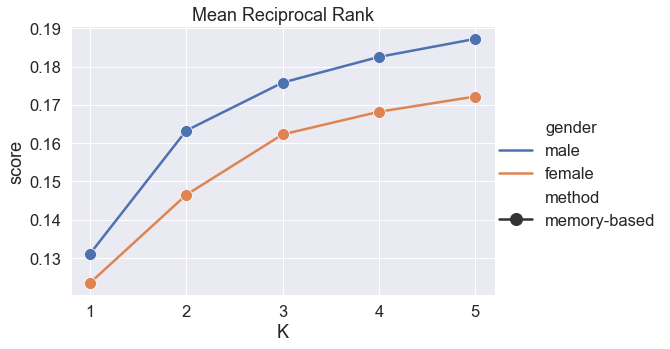

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 12})
ax = sns.relplot(x="n", y="score", hue="gender", style="method",height=5, aspect=1.5,
            dashes=False, markers=True, kind="line", data=MRR)
ax.set(title = "Mean Reciprocal Rank", xlabel = 'K')

In [277]:
MRR_MF = pd.read_csv("matrix_factorization_MRR.csv", index_col = 0)

In [278]:
MRR_MF

,n,score,gender,method
0,1,0.645833,male,model-based
1,1,0.649626,female,model-based
2,2,0.710685,male,model-based
3,2,0.710723,female,model-based
4,3,0.727487,male,model-based
5,3,0.724023,female,model-based
6,4,0.735719,male,model-based
7,4,0.732751,female,model-based
8,5,0.738945,male,model-based
9,5,0.735744,female,model-based


In [280]:
MRR = MRR.append(MRR_MF)

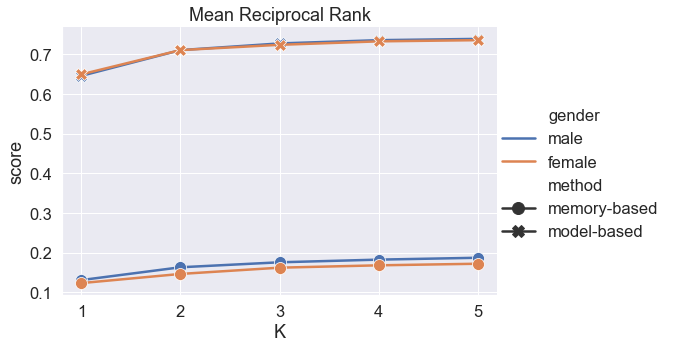

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 12})
ax = sns.relplot(x="n", y="score", hue="gender", style="method",height=5, aspect=1.5,
            dashes=False, markers=True, kind="line", data=MRR)
ax.set(title = "Mean Reciprocal Rank", xlabel = 'K')